In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def CV2_show(name, img):
    cv2.imshow(name, img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

使用cv2.calcHist(images, channels, mask, histSize, ranges)函数计算图像的直方图
- images:传入图像若为uint8或float32，需要用[]括起来
- channels:颜色通道数目，灰度图为[0],彩色图为[0][1][2],对应为BGR
- mask:掩膜图像。统计整个图像的直方图，则为None;若统计部分图像的直方图，则需要制作一个掩模并使用它
- histSize:BIN的数目，也用中括号括起来
- ranges:像素值范围

In [3]:
img = cv2.imread("shrink37.jpg", cv2.IMREAD_GRAYSCALE)
hist = cv2.calcHist([img],[0],None, [256], [0,256])
hist.shape

(256, 1)

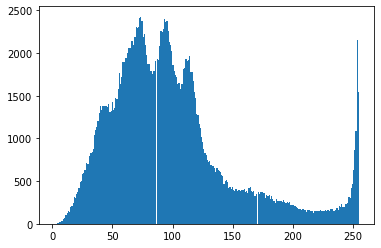

In [4]:
plt.hist(img.ravel(),256)
plt.show()

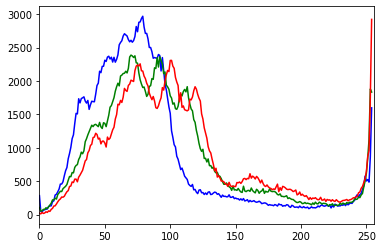

In [5]:
img = cv2.imread("shrink37.jpg")
color = ['b','g','r']
for i, col in enumerate(color):
    hister = cv2.calcHist([img], [i], None, [255], [0,256])
    plt.plot(hister, color = col)
    plt.xlim([0,256]) 

Mask操作

In [6]:
# 创建mask 由0和1组成
mask = np.zeros(img.shape[:2], np.uint8)
mask[100:400, 50:350] = 255
mask_BGR = np.expand_dims(mask, 2)
CV2_show("mask", mask)
CV2_show("img", img)
mask_BGR.shape

(549, 400, 1)

In [7]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
mask_img = cv2.bitwise_and(img_gray, mask)
CV2_show("mask_img", mask_img)

In [8]:
hist_full = cv2.calcHist([img], [0], None, [255], [0,256])
hist_mask = cv2.calcHist([img], [0], mask, [255], [0,256])

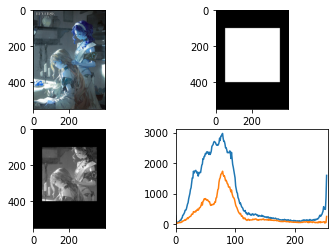

In [9]:
plt.subplot(2,2,1), plt.imshow(img, 'gray')
plt.subplot(2,2,2), plt.imshow(mask, 'gray')
plt.subplot(2,2,3), plt.imshow(mask_img, 'gray')
plt.subplot(2,2,4), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])
plt.show()

直方图均值化  
均值化函数cv2.equalizeHist(img)

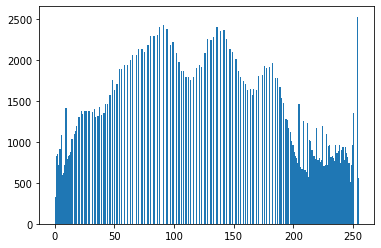

In [10]:
equ = cv2.equalizeHist(img_gray)
plt.hist(equ.ravel(), 256)
plt.show()
CV2_show("equ", equ)

自适应直方图均值化

In [11]:
# 局部做可以保留一部分细节，但是更容易受到噪音点的影响
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8)) # 创建均值化模块
res_calch = clahe.apply(img_gray)
res = np.hstack((img_gray, equ, res_calch))
CV2_show("res", res)

均值化在视觉效果上，使图像更清晰，对比度更加强烈  
但是，对于原始图像数据来说，均值化会造成图像的信息流失